   # PREDICTIVE ANALYSIS USING MACHINE LEARNING

## Task -- 
BUILD A MACHINE LEARNING MODEL (E.G.,REGRESSION OR CLASSIFICATION) TO PREDICT OUTCOMES BASED ON A DATASET.

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [9]:
Titanic = pd.read_csv("Titanic-Dataset.csv")
print(Titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [13]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
Titanic.shape

(891, 12)

In [18]:
Titanic.duplicated().sum()

0

# Remove Null or Blank value

In [19]:
#  we will fill blank with median value

Titanic['Age'].fillna(Titanic['Age'].median(), inplace=True)

In [20]:
# Count the Embarked

Titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
# replace blanks with mode value

Titanic['Embarked'].fillna('S', inplace=True)

In [22]:
# check Null value in data

Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
# In fare column has also null value, replace with  median

Titanic['Fare'].fillna(Titanic['Fare'].median(), inplace=True)

In [24]:
# We will remove the "Cabin" column because it contains a significant number of missing values.

Titanic.drop(columns="Cabin", inplace=True)

In [25]:
# Last check null value and Dataset

print(Titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [26]:
print(Titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


# Exploratory Data Analysis

## survival variable describe as

0 = No, 1 = Yes

In [27]:
import seaborn as sns

In [28]:
Titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

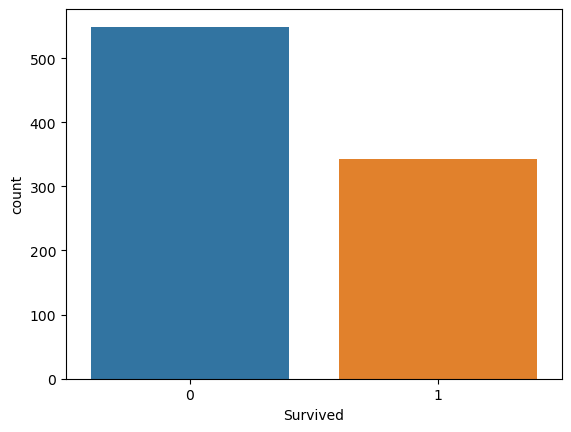

In [29]:
sns.countplot(data=Titanic,x='Survived')

## Pclass data describe as:
  .1st = Upper

   .2nd = Middle

   .3rd = Lower

<Axes: xlabel='Pclass', ylabel='count'>

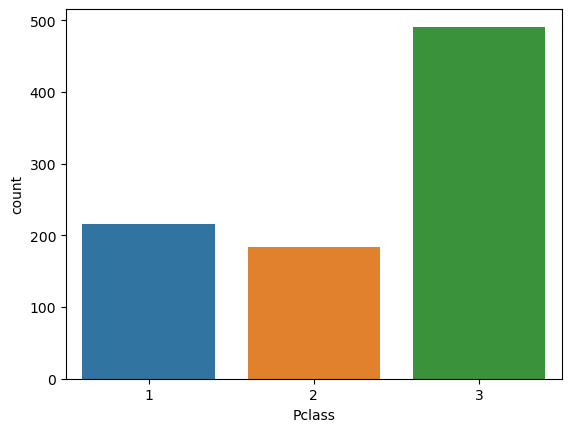

In [30]:
sns.countplot(data=Titanic,x='Pclass')

<Axes: xlabel='Sex', ylabel='count'>

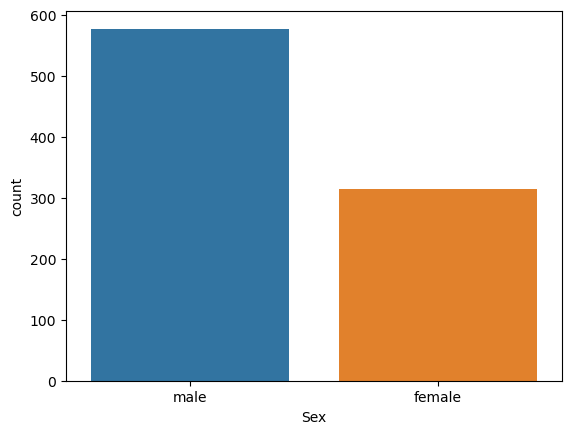

In [31]:
sns.countplot(data=Titanic,x='Sex')

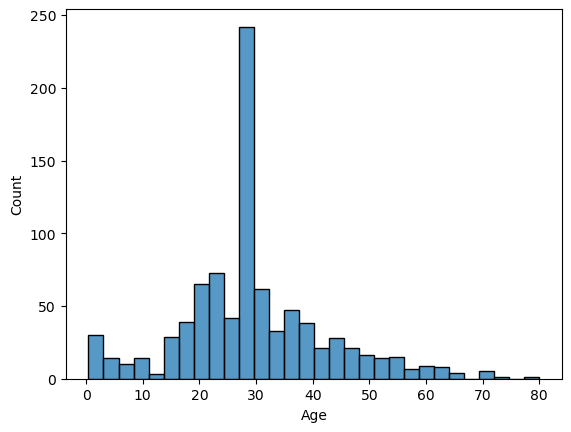

In [32]:
sns.histplot(data=Titanic, x='Age')
plt.show()

# Show count of survival by pclass

In [33]:
Titanic['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

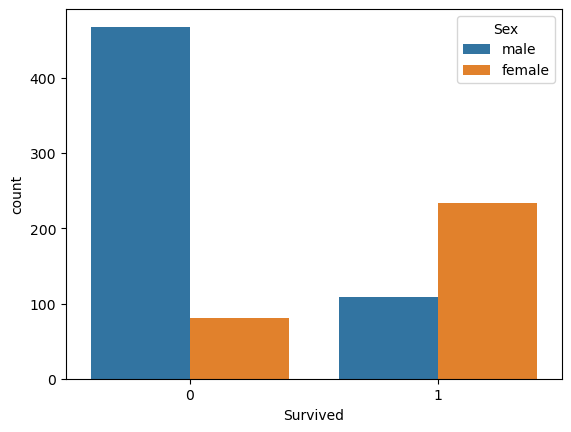

In [34]:
sns.countplot(x=Titanic['Survived'], hue=Titanic['Sex'])
plt.show()

# Show survival rate by Age

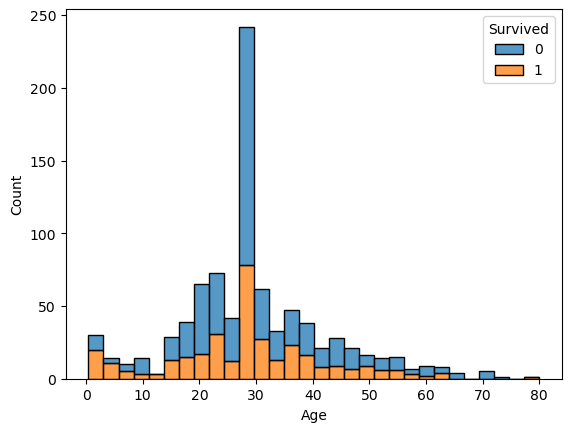

In [35]:
sns.histplot(x=Titanic['Age'], hue=Titanic['Survived'], multiple='stack')
plt.show()

# show survived by Embarked..
Port of Embarkation

C = Cherbourg,
Q = Queenstown,
S = Southampton

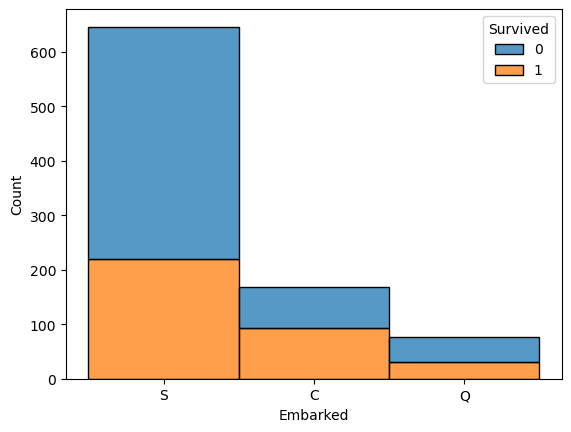

In [36]:
sns.histplot(x=Titanic['Embarked'], hue=Titanic['Survived'], multiple='stack')
plt.show()

# Show survival by Fare

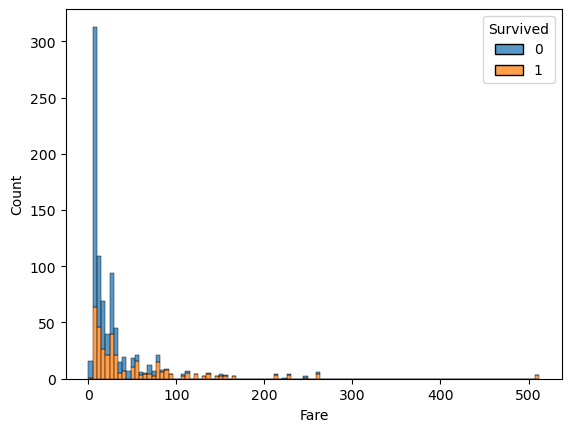

In [37]:
sns.histplot(x=Titanic['Fare'], hue=Titanic['Survived'], multiple='stack')
plt.show()

# Before modeling the data, transform gender(Sex) into numeric

 .Male - 1

 .Female - 0

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Titanic['Sex'] = labelencoder.fit_transform(Titanic['Sex'])

Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [39]:
Titanic['Survived'] = Titanic['Survived'].astype(str)

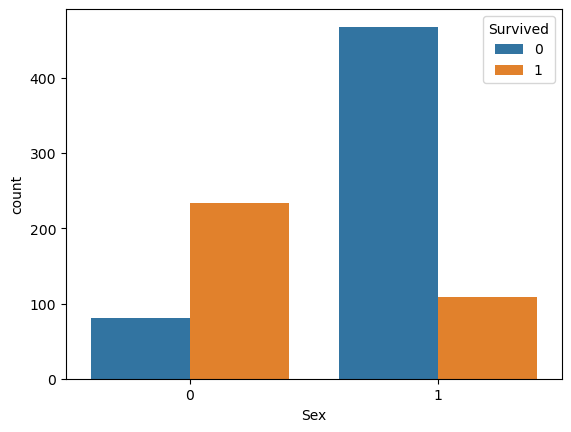

In [40]:
sns.countplot(x=Titanic['Sex'],hue=Titanic['Survived'])
plt.show()

## Drop unneccasey column for modeling

In [41]:
Titanic.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Fare","Age", "Embarked"],inplace=True,errors='ignore')
print(Titanic.columns)

Index(['Survived', 'Pclass', 'Sex'], dtype='object')


In [42]:
Titanic.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


# Modeling

In [43]:
X=Titanic[['Sex', 'Pclass']]
Y=Titanic['Survived']

In [44]:
#Split data into test and train by using Sklearn library

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

# Create Training Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

## Create Prediction Model

In [46]:
pred = log.predict(X_test)
pred

array(['0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0',
       '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1',
       '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0',
       '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0',
       '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '1', '0', '0'], dtype=

In [47]:
print("Accuracy_score :", accuracy_score(Y_test, pred))
print("Matrix :",confusion_matrix(Y_test,pred))

Accuracy_score : 0.7877094972067039
Matrix : [[92 18]
 [20 49]]


In [48]:
Y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: object

In [49]:
submission=X.iloc[:,:].values
y_final=log.predict(submission)

C:\Users\debar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
y_final.shape

(891,)

In [51]:
final = pd.DataFrame()
final["Sex"]= X['Sex']
final["survived"]=y_final

In [52]:
final.to_csv("submission.csv",index=False)

# predict( Pclass, Sex ) => survived or not survived

In [53]:
import warnings
warnings.filterwarnings("ignore")

result = log.predict([[5,0]])
if(result == 0):
    print("So sorry, Not Survived")
else:
    print("Survived")

Survived
